*_Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data. In this chapter, you'll understand how bagging can be used to create a tree ensemble. You'll also learn how the random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble._*

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
d = datasets.load_breast_cancer()

In [5]:
X = d.data
y = d.target

In [6]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)

In [7]:
SEED = 123

In [9]:
dt = DecisionTreeClassifier(max_depth=4,min_samples_leaf=0.16,random_state=SEED)

In [10]:
bc = BaggingClassifier(base_estimator=dt,n_estimators=300,n_jobs=-1)

In [11]:
bc.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        min_samples_leaf=0.16,
                                                        random_state=123),
                  n_estimators=300, n_jobs=-1)

In [12]:
y_pred = bc.predict(X_test)

In [13]:
accuracy_score(y_test,y_pred)

0.9649122807017544

In [14]:
y_pred_dt = dt.fit(X_train,y_train).predict(X_test)

In [15]:
accuracy_score(y_test,y_pred_dt)

0.9210526315789473

## Out of Bag evaluation

In [16]:
bc1 = BaggingClassifier(base_estimator=dt,n_estimators=300,n_jobs=-1,oob_score=True)

In [17]:
bc1.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        min_samples_leaf=0.16,
                                                        random_state=123),
                  n_estimators=300, n_jobs=-1, oob_score=True)

In [18]:
y_pred = bc1.predict(X_test)

In [23]:
print(accuracy_score(y_test,y_pred))
print(bc1.oob_score_)

0.956140350877193
0.9142857142857143


## Random Forest Ensemble model

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [27]:
d2 = datasets.load_boston()

In [28]:
X = d2.data
y = d2.target

In [29]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [31]:
rf = RandomForestRegressor(n_estimators=300,min_samples_leaf=0.16,random_state=123)

In [32]:
rf.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=0.16, n_estimators=300, random_state=123)

In [35]:
y_pred = rf.predict(X_test)
print(mean_squared_error(y_test,y_pred))

32.550740882065156


In [37]:
rmse = mean_squared_error(y_test,y_pred) ** 0.5
print(rmse)

5.705325659597808


In [52]:
imp_list = pd.Series(rf.feature_importances_,)

In [55]:
imp_list.index = d2.feature_names
print(imp_list)

CRIM       0.000355
ZN         0.000000
INDUS      0.000000
CHAS       0.000000
NOX        0.004884
RM         0.173695
AGE        0.000000
DIS        0.008372
RAD        0.000000
TAX        0.000349
PTRATIO    0.000000
B          0.000000
LSTAT      0.812344
dtype: float64


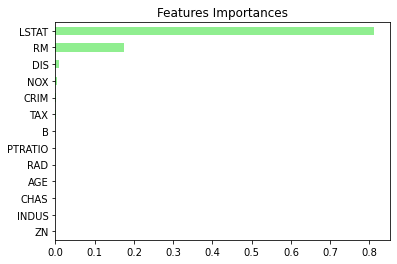

In [58]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= d2.feature_names)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()